In [1]:
import joblib
import pandas as pd
from quadratic_weighted_kappa import quadratic_weighted_kappa
from scipy.stats import pearsonr
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
scores = pd.read_excel("asap6_saja.xlsx")
y =  joblib.load('score_asap6')
model_score = joblib.load('score_model_normalized')

In [3]:
scores

,rater1_domain1,rater2_domain1
0,2,2
1,3,3
2,3,4
3,1,1
4,3,3
...,...,...
1795,2,0
1796,1,2
1797,2,3
1798,2,1


In [4]:
scores['model_score'] = model_score
scores['y'] = y

In [5]:
scores

,rater1_domain1,rater2_domain1,model_score,y
0,2,2,3.0,2
1,3,3,4.0,3
2,3,4,4.0,4
3,1,1,2.0,1
4,3,3,3.0,3
...,...,...,...,...
1795,2,0,2.0,0
1796,1,2,2.0,2
1797,2,3,3.0,3
1798,2,1,2.0,2


In [6]:
quadratic_weighted_kappa(y, model_score)

0.7982639655911743

In [7]:
pearsonr(y, model_score)

(0.8024287682478765, 0.0)

In [8]:
quadratic_weighted_kappa(scores['rater1_domain1'], scores['rater2_domain1'])

0.7764876632801161

In [9]:
pearsonr(scores['rater1_domain1'], scores['rater2_domain1'])

(0.7765388466877492, 0.0)

In [10]:
rater1_score = scores['rater1_domain1']
rater2_score = scores['rater2_domain1']

In [23]:
y

array([2, 3, 4, ..., 3, 2, 2], dtype=int64)

In [24]:
#scores.to_excel('asap6_summary.xlsx')

In [25]:
discrepancy_r1r2 = rater1_score == rater2_score
type(discrepancy_r1r2)

pandas.core.series.Series

In [28]:
diff = rater1_score - rater2_score
diff_abs = list(map(abs, diff))
diff

0       0
1       0
2      -1
3       0
4       0
       ..
1795    2
1796   -1
1797   -1
1798    1
1799    0
Length: 1800, dtype: int64

In [15]:
diff_abs[-5:]

[2, 1, 1, 1, 0]

In [29]:
scores['diff_r1r2'] = diff_abs
scores

,rater1_domain1,rater2_domain1,model_score,y,diff_r1r2
0,2,2,3.0,2,0
1,3,3,4.0,3,0
2,3,4,4.0,4,1
3,1,1,2.0,1,0
4,3,3,3.0,3,0
...,...,...,...,...,...
1795,2,0,2.0,0,2
1796,1,2,2.0,2,1
1797,2,3,3.0,3,1
1798,2,1,2.0,2,1


In [30]:
diff_y_model = model_score - y
diff_y_model_abs = list(map(abs, diff_y_model))
diff_y_model

array([1., 1., 0., ..., 0., 0., 0.])

In [31]:
diff_y_model_abs = list(map(int, diff_y_model_abs))
diff_y_model_abs[-3:]

[0, 0, 0]

In [32]:
scores['diff_model_y'] = diff_y_model_abs
scores

,rater1_domain1,rater2_domain1,model_score,y,diff_r1r2,diff_model_y
0,2,2,3.0,2,0,1
1,3,3,4.0,3,0,1
2,3,4,4.0,4,1,0
3,1,1,2.0,1,0,1
4,3,3,3.0,3,0,0
...,...,...,...,...,...,...
1795,2,0,2.0,0,2,2
1796,1,2,2.0,2,1,0
1797,2,3,3.0,3,1,0
1798,2,1,2.0,2,1,0


In [55]:
scores.to_excel('asap6_summary.xlsx')

In [33]:
diff_r1r2 = list(scores['diff_r1r2'])
diff_model_y = list(scores['diff_model_y'])

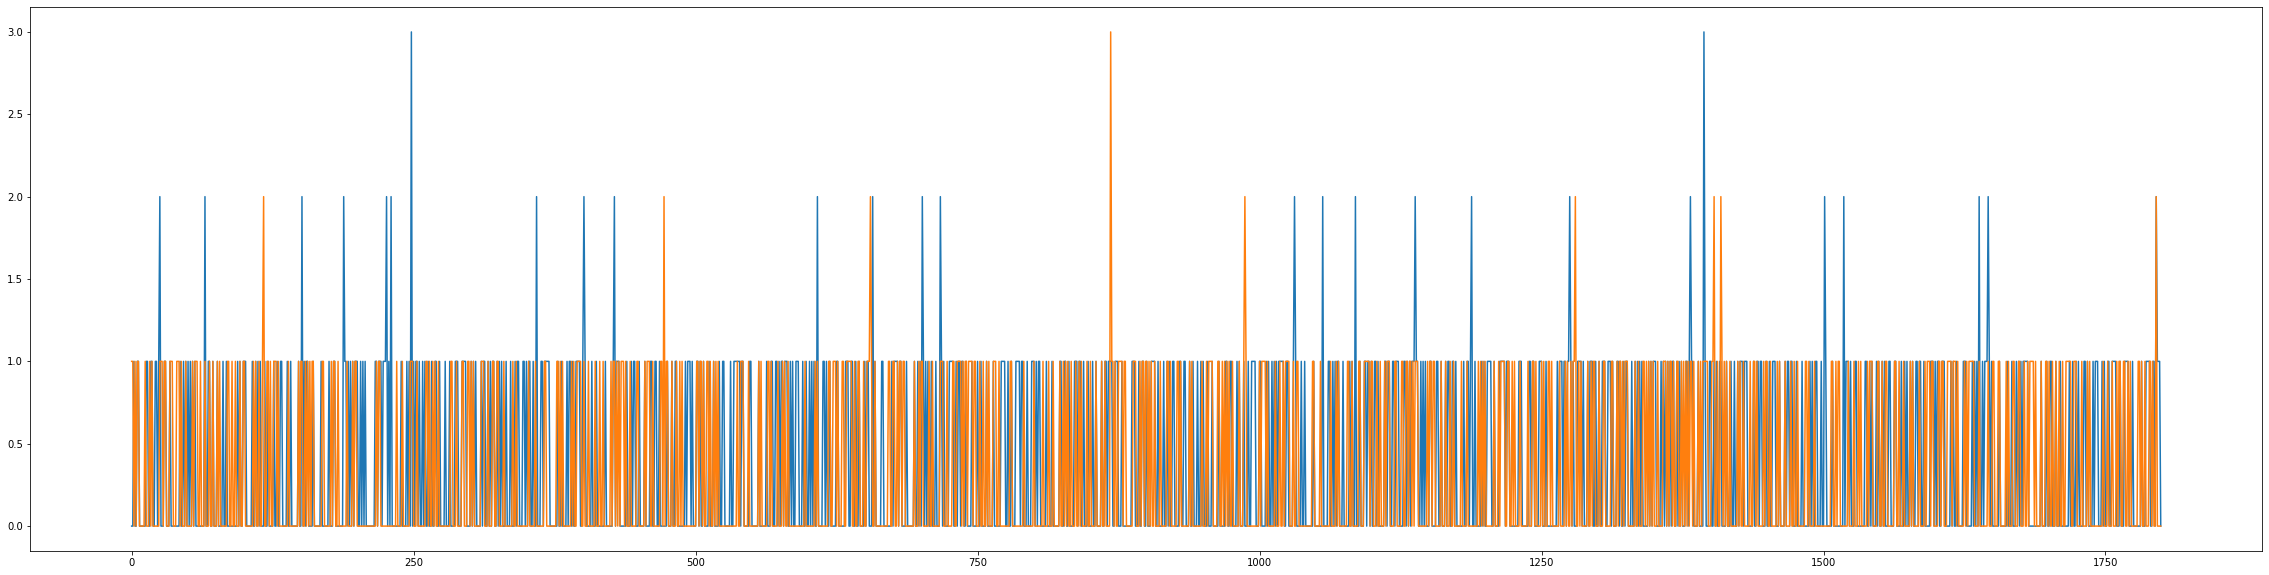

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40,10))
plt.plot(diff_r1r2)
plt.plot(diff_model_y)
plt.show()

In [35]:
diff = np.array(diff_r1r2) - np.array(diff_model_y)
diff_abs = list(map(abs,diff))
diff

array([-1, -1,  1, ...,  1,  1,  0])

In [36]:
diff_abs[-3:]

[1, 1, 0]

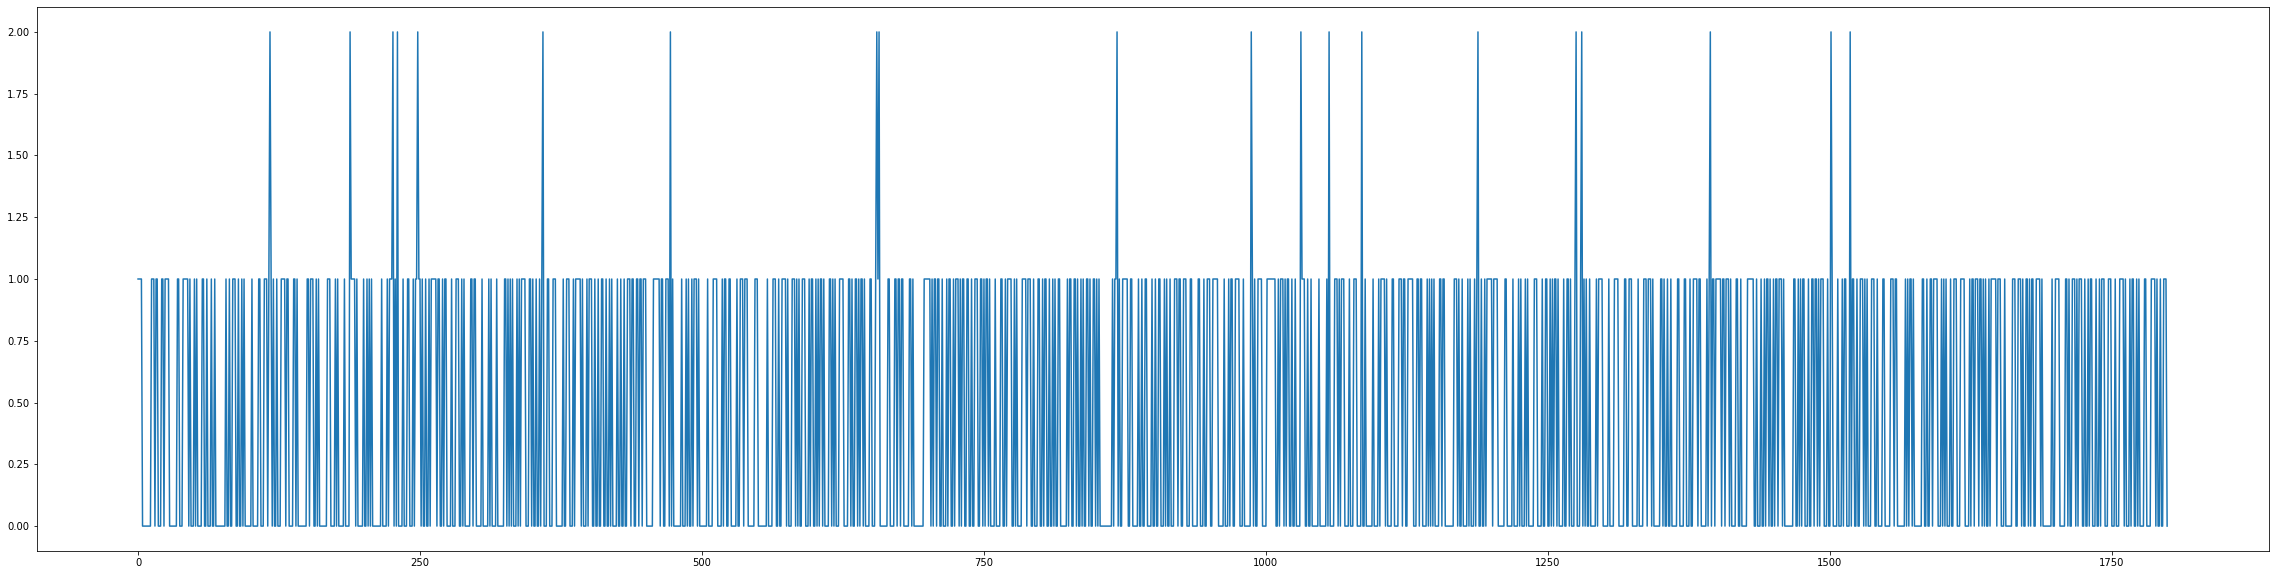

In [37]:
plt.figure(figsize=(40,10))
plt.plot(diff_abs)
plt.show()

In [38]:
from collections import Counter
Counter(diff_abs)

Counter({1: 753, 0: 1027, 2: 20})

In [39]:
bad_scores = scores[scores['diff_model_y'] != 0]
good_scores = scores[scores['diff_model_y'] == 0]

In [40]:
bad_scores

,rater1_domain1,rater2_domain1,model_score,y,diff_r1r2,diff_model_y
0,2,2,3.0,2,0,1
1,3,3,4.0,3,0,1
3,1,1,2.0,1,0,1
5,4,3,3.0,4,1,1
6,2,3,2.0,3,1,1
...,...,...,...,...,...,...
1785,2,2,3.0,2,0,1
1789,4,3,3.0,4,1,1
1790,3,3,4.0,3,0,1
1792,3,2,3.0,2,1,1


In [41]:
Counter(bad_scores['diff_r1r2'])

Counter({0: 333, 1: 241, 2: 13, 3: 2})

In [42]:
good_scores

,rater1_domain1,rater2_domain1,model_score,y,diff_r1r2,diff_model_y
2,3,4,4.0,4,1,0
4,3,3,3.0,3,0,0
7,3,3,3.0,3,0,0
8,3,3,3.0,3,0,0
9,3,3,3.0,3,0,0
...,...,...,...,...,...,...
1794,3,3,3.0,3,0,0
1796,1,2,2.0,2,1,0
1797,2,3,3.0,3,1,0
1798,2,1,2.0,2,1,0


In [43]:
Counter(good_scores['diff_r1r2'])

Counter({1: 411, 0: 788, 2: 12})

## Passing, Borderline, Failing
#### 0,1 failing
#### 2 bordeline
#### 3,4 passing

In [11]:
Counter(rater1_score)

Counter({2: 462, 3: 807, 1: 213, 4: 263, 0: 55})

In [12]:
r1 = dict(Counter(rater1_score))

rater1_score_passing = r1[3] + r1[4]
rater1_score_borderline = r1[2]
rater1_score_failing = r1[0] + r1[1]

total = rater1_score_passing + rater1_score_borderline + rater1_score_failing
total

1800

In [13]:
Counter(rater2_score)

Counter({2: 466, 3: 809, 4: 254, 1: 215, 0: 56})

In [14]:
r2 = dict(Counter(rater2_score))

rater2_score_passing = r2[3] + r2[4]
rater2_score_borderline = r2[2]
rater2_score_failing = r2[0] + r2[1]

total = rater2_score_passing + rater2_score_borderline + rater2_score_failing
total

1800

In [15]:
Counter(model_score)

Counter({3.0: 857, 4.0: 320, 2.0: 449, 1.0: 164, 0.0: 10})

In [16]:
m = dict(Counter(model_score))

model_score_passing = m[3] + m[4]
model_score_borderline = m[2]
model_score_failing = m[0] + m[1]

total = model_score_passing + model_score_borderline + model_score_failing
total

1800

In [32]:
print("Passing")
print("rater1_score: ", rater1_score_passing)
print("rater2_score: ", rater2_score_passing)
print("model_score: ", model_score_passing)

Passing
rater1_score:  1070
rater2_score:  1063
model_score:  1171


In [34]:
print("Borderline")
print("rater1_score: ", rater1_score_borderline)
print("rater2_score: ", rater2_score_borderline)
print("model_score: ", model_score_borderline)

Borderline
rater1_score:  462
rater2_score:  466
model_score:  460


In [33]:
print("Failing")
print("rater1_score: ", rater1_score_failing)
print("rater2_score: ", rater2_score_failing)
print("model_score: ", model_score_failing)

Failing
rater1_score:  268
rater2_score:  271
model_score:  169


## Quantitative Assessment of AES Model

## z must be lower than 0.15

In [8]:
human1_score = np.array(rater1_score)
human2_score = np.array(rater2_score)

In [9]:
human2_score

array([2, 3, 4, ..., 3, 1, 2], dtype=int64)

In [10]:
model_mean = np.mean(model_score)
print(model_mean)
y_mean = np.mean(y)
print(y_mean)
mean_diff = abs(model_mean-y_mean)
print(mean_diff)

2.7294444444444443
2.72
0.009444444444444144


In [11]:
model_variance = np.var(model_score)
print(model_variance)
y_variance = np.var(y)
print(y_variance)

0.7684663580246913
0.9415999999999999


In [12]:
z = mean_diff / np.sqrt((model_variance + y_variance)/2)
z

0.010213743155821952

## Statistics

### mean

In [41]:
print("Mean Human-1 score: ", np.mean(human1_score))
print("Mean Human-2 score: ", np.mean(human2_score))
print("Mean model score: ", np.mean(model_score))
print("Mean label: ", np.mean(y))

Mean Human-1 score:  2.561111111111111
Mean Human-2 score:  2.55
Mean model score:  2.7294444444444443
Mean label:  2.72


### median

In [43]:
print("Median Human-1 score: ", np.median(human1_score))
print("Median Human-2 score: ", np.median(human2_score))
print("Median model score: ", np.median(model_score))
print("Median label: ", np.median(y))

Median Human-1 score:  3.0
Median Human-2 score:  3.0
Median model score:  3.0
Median label:  3.0


### Standard Deviation

In [42]:
print("SD Human-1 score: ", np.std(human1_score))
print("SD Human-2 score: ", np.std(human2_score))
print("SD model score: ", np.std(model_score))
print("SD label: ", np.std(y))

SD Human-1 score:  0.9790238272488507
SD Human-2 score:  0.9773831274263834
SD model score:  0.8766221295545141
SD label:  0.9703607576566562


### summary

In [130]:
scores.describe()

,rater1_domain1,rater2_domain1,model_score,y
count,1800.000000,1800.000000,1800.000000,1800.00000
mean,2.561111,2.550000,2.727222,2.72000
std,0.979296,0.977655,0.881868,0.97063
min,0.000000,0.000000,0.000000,0.00000
25%,2.000000,2.000000,2.000000,2.00000
50%,3.000000,3.000000,3.000000,3.00000
75%,3.000000,3.000000,3.000000,3.00000
max,4.000000,4.000000,4.000000,4.00000


### ANOVA test

In [44]:
# Test if data have the same means
from scipy.stats import f_oneway
f_oneway(human1_score, model_score)

F_onewayResult(statistic=29.518252092682275, pvalue=5.9068042840779465e-08)

In [45]:
# Test if data have the same means
from scipy.stats import f_oneway
f_oneway(human2_score, model_score)

F_onewayResult(statistic=33.606121722900426, pvalue=7.328902735439554e-09)

### t test

In [132]:
from scipy.stats import ttest_ind, ttest_rel
ttest_ind(human1_score, model_score)

Ttest_indResult(statistic=-5.347750077213234, pvalue=9.460209593424169e-08)

### normality test

In [133]:
from scipy.stats import normaltest
normaltest(human1_score)

NormaltestResult(statistic=86.21098518383313, pvalue=1.9033665276999559e-19)

In [134]:
from scipy.stats import shapiro
shapiro(human1_score)

(0.878917396068573, 2.6562114347597216e-35)

### skewness

In [135]:
from scipy.stats import skew
skew(human1_score)

-0.5708475213261069

In [136]:
from scipy.stats import kurtosis
kurtosis(human1_score)

-0.07647306712805912

### Levene (equality of variance)

In [137]:
from scipy.stats import levene
levene(model_score, y)

LeveneResult(statistic=5.884564665154449, pvalue=0.015323036509000859)

### Kruskall-Wallis (test if median of all groups are equal)

In [142]:
from scipy.stats import kruskal
kruskal(human1_score, human2_score, model_score)

KruskalResult(statistic=30.511698379962176, pvalue=2.368475409402742e-07)

In [92]:
a = np.sort(human1_score)
a

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [99]:
from collections import Counter
Counter(a)

Counter({0: 55, 1: 213, 2: 462, 3: 807, 4: 263})

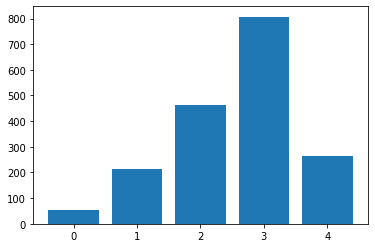

In [105]:
plt.bar(*zip(*dict(Counter(human1_score)).items()))
plt.show()

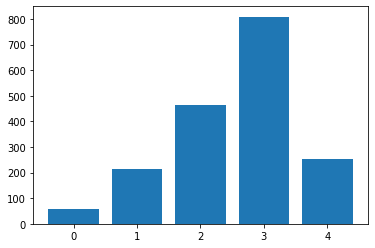

In [106]:
plt.bar(*zip(*dict(Counter(human2_score)).items()))
plt.show()

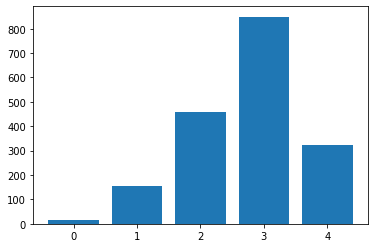

In [107]:
plt.bar(*zip(*dict(Counter(model_score)).items()))
plt.show()

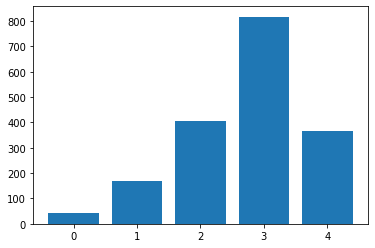

In [108]:
plt.bar(*zip(*dict(Counter(y)).items()))
plt.show()

c:\users\20167947\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


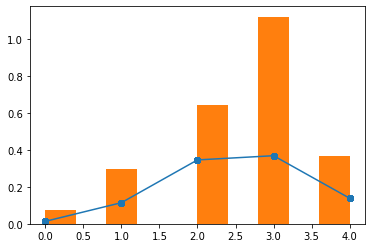

In [104]:
import pylab as pl
import scipy.stats as stats

fit = stats.norm.pdf(a, np.mean(a), np.std(a))  #this is a fitting indeed

pl.plot(a,fit,'-o')

pl.hist(a,normed=True)      #use this to draw histogram of your data

pl.show() 

## Studying model behaviour

### 1. Answer Length

In [17]:
x = joblib.load('essay_ease10_sbert768_simbow_langerr_780')
answer_length = x[:,0]

In [18]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(answer_length, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Answer Length)' % corr)
corr, _ = pearsonr(answer_length, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Answer Length)' % corr)
corr, _ = pearsonr(answer_length, model_score)
print('Pearson\'s correlation Model : %.3f  (Answer Length)' % corr)

Pearson's correlation Human-1 : 0.666  (Answer Length)
Pearson's correlation Human-2 : 0.678  (Answer Length)
Pearson's correlation Model : 0.771  (Answer Length)


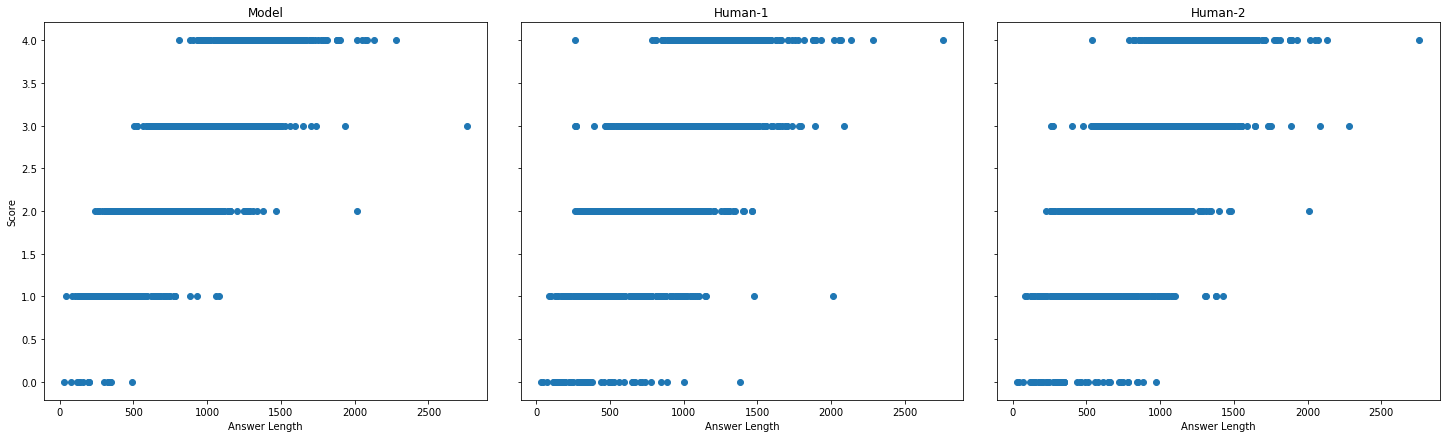

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(answer_length, model_score)
axs[0].set_title('Model')
axs[1].scatter(answer_length, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(answer_length, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Answer Length', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.savefig('answer_length.png', bbox_inches="tight")

### 2. Word Counts

In [22]:
word_count = x[:,1]

In [23]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(word_count, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Word Count)' % corr)
corr, _ = pearsonr(word_count, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Word Count)' % corr)
corr, _ = pearsonr(word_count, model_score)
print('Pearson\'s correlation Model : %.3f  (Word Count)' % corr)

Pearson's correlation Human-1 : 0.653  (Word Count)
Pearson's correlation Human-2 : 0.670  (Word Count)
Pearson's correlation Model : 0.762  (Word Count)


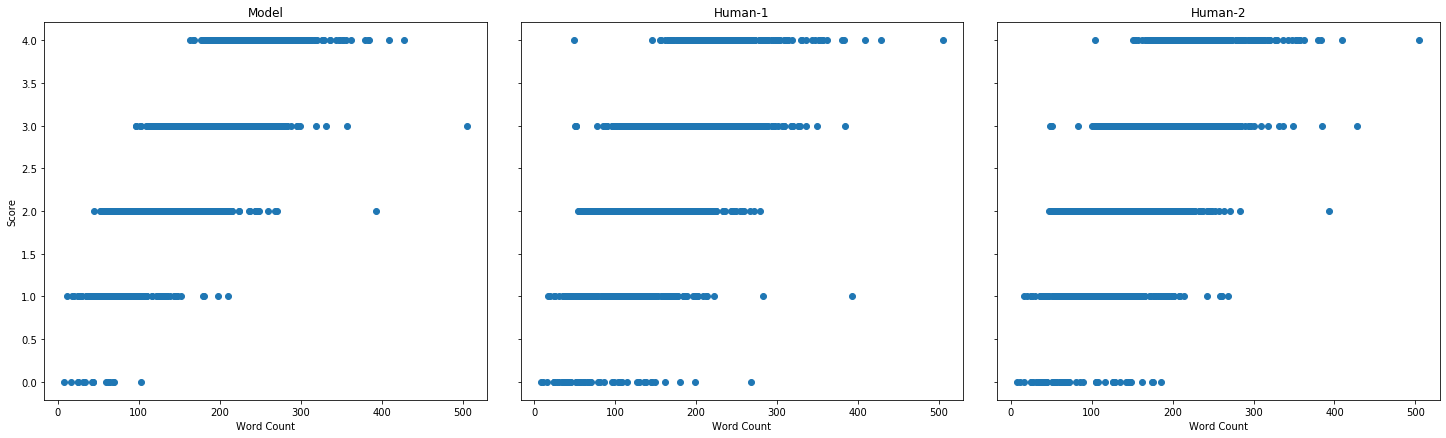

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(word_count, model_score)
axs[0].set_title('Model')
axs[1].scatter(word_count, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(word_count, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Word Count', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('word_count.png', bbox_inches="tight")

### 3. Average Word Length

In [25]:
avg_word_length = x[:,2]

In [26]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(avg_word_length, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Average Word Length)' % corr)
corr, _ = pearsonr(avg_word_length, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Average Word Length)' % corr)
corr, _ = pearsonr(avg_word_length, model_score)
print('Pearson\'s correlation Model : %.3f  (Average Word Length)' % corr)

Pearson's correlation Human-1 : 0.410  (Average Word Length)
Pearson's correlation Human-2 : 0.379  (Average Word Length)
Pearson's correlation Model : 0.428  (Average Word Length)


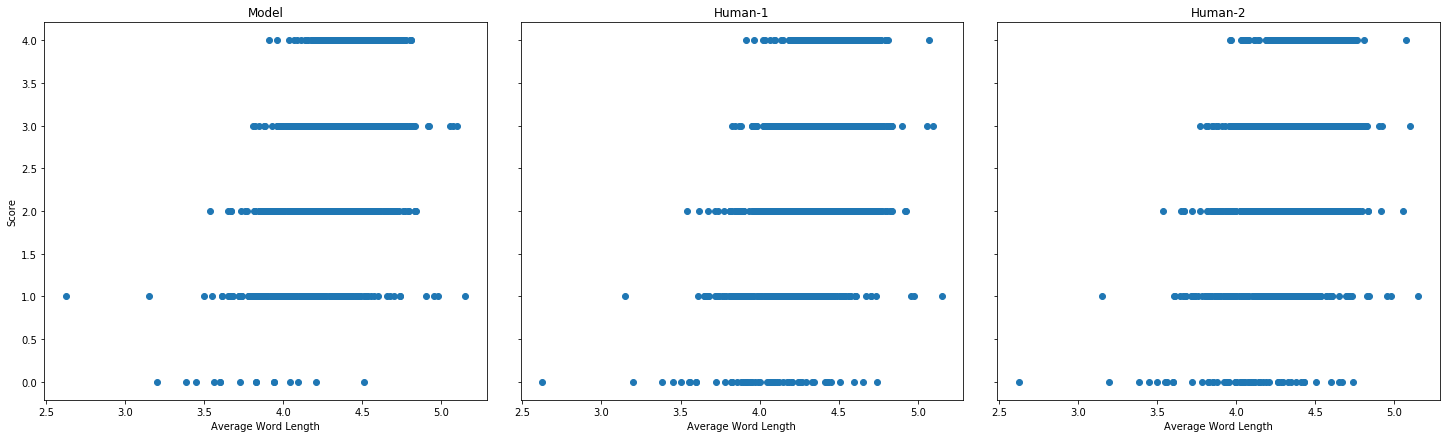

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(avg_word_length, model_score)
axs[0].set_title('Model')
axs[1].scatter(avg_word_length, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(avg_word_length, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Average Word Length', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('avg_word_length.png', bbox_inches="tight")

### 4. Good n-gram

In [28]:
good_ngram = x[:,3]

In [29]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(good_ngram, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Good n-gram)' % corr)
corr, _ = pearsonr(good_ngram, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Good n-gram)' % corr)
corr, _ = pearsonr(good_ngram, model_score)
print('Pearson\'s correlation Model : %.3f  (Good n-gram)' % corr)

Pearson's correlation Human-1 : 0.653  (Good n-gram)
Pearson's correlation Human-2 : 0.669  (Good n-gram)
Pearson's correlation Model : 0.761  (Good n-gram)


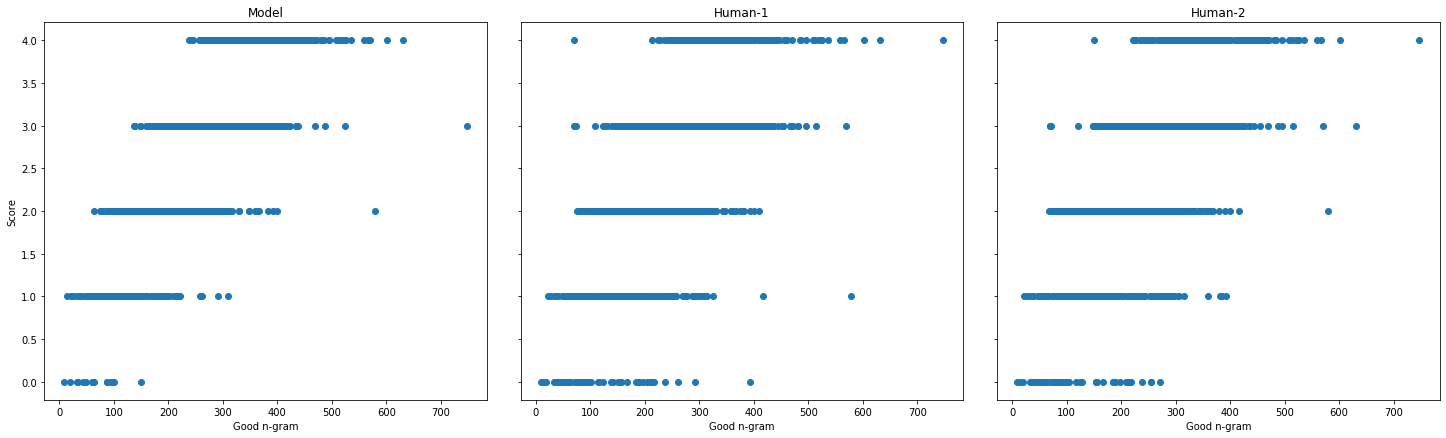

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(good_ngram, model_score)
axs[0].set_title('Model')
axs[1].scatter(good_ngram, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(good_ngram, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Good n-gram', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('good_ngram.png', bbox_inches="tight")

### 5. Prompt Overlap

In [31]:
prompt_overlap = x[:,4]

Pearson's correlation Human-1 : 0.665  (Prompt Overlap)
Pearson's correlation Human-2 : 0.678  (Prompt Overlap)
Pearson's correlation Model : 0.772  (Prompt Overlap)


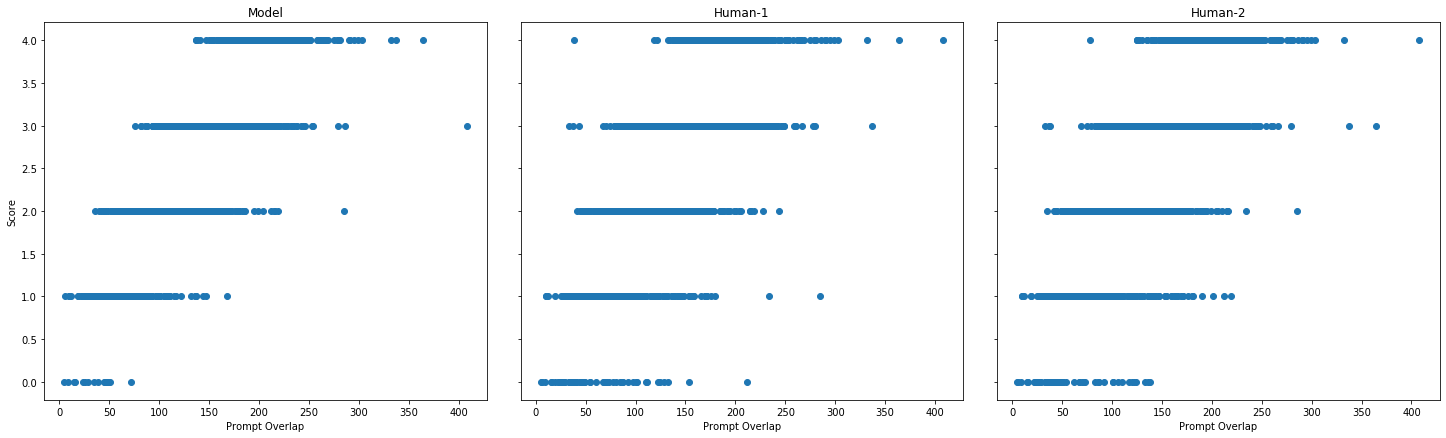

In [32]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(prompt_overlap, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Prompt Overlap)' % corr)
corr, _ = pearsonr(prompt_overlap, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Prompt Overlap)' % corr)
corr, _ = pearsonr(prompt_overlap, model_score)
print('Pearson\'s correlation Model : %.3f  (Prompt Overlap)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(prompt_overlap, model_score)
axs[0].set_title('Model')
axs[1].scatter(prompt_overlap, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(prompt_overlap, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Prompt Overlap', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('prompt_overlap.png', bbox_inches="tight")

### 6. Prompt Overlap (synonym)

In [33]:
prompt_overlap_syn = x[:,5]

Pearson's correlation Human-1 : 0.644  (Prompt Overlap Synonym)
Pearson's correlation Human-2 : 0.660  (Prompt Overlap Synonym)
Pearson's correlation Model : 0.757  (Prompt Overlap Synonym)


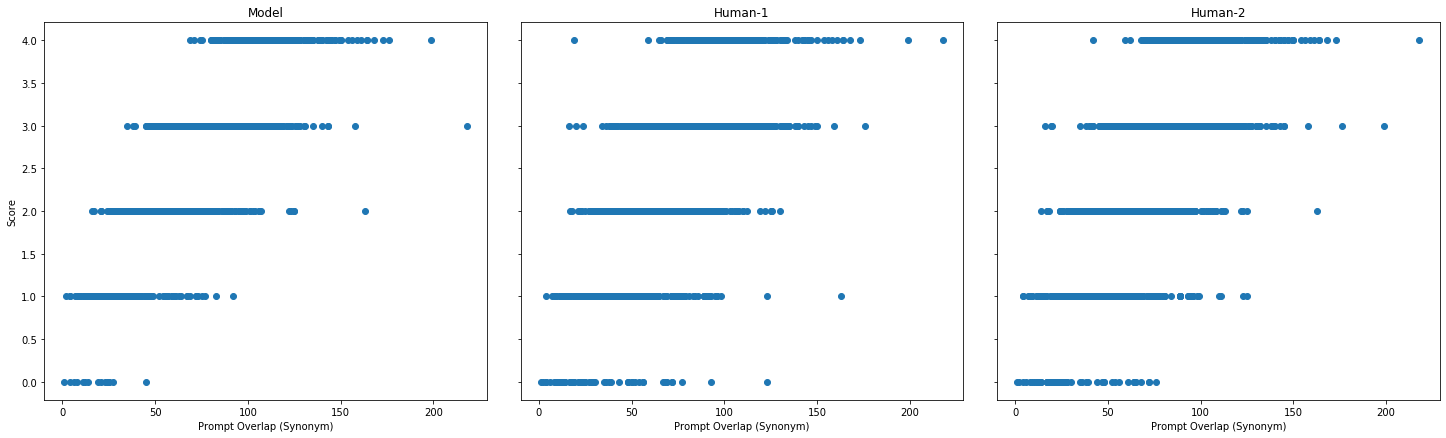

In [34]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(prompt_overlap_syn, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Prompt Overlap Synonym)' % corr)
corr, _ = pearsonr(prompt_overlap_syn, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Prompt Overlap Synonym)' % corr)
corr, _ = pearsonr(prompt_overlap_syn, model_score)
print('Pearson\'s correlation Model : %.3f  (Prompt Overlap Synonym)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(prompt_overlap_syn, model_score)
axs[0].set_title('Model')
axs[1].scatter(prompt_overlap_syn, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(prompt_overlap_syn, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Prompt Overlap (Synonym)', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('prompt_overlap_syn.png', bbox_inches="tight")

### 7. Punctuation Counts

In [37]:
punc_count = x[:,6]

Pearson's correlation Human-1 : 0.549  (Punctuation Count)
Pearson's correlation Human-2 : 0.571  (Punctuation Count)
Pearson's correlation Model : 0.646  (Punctuation Count)


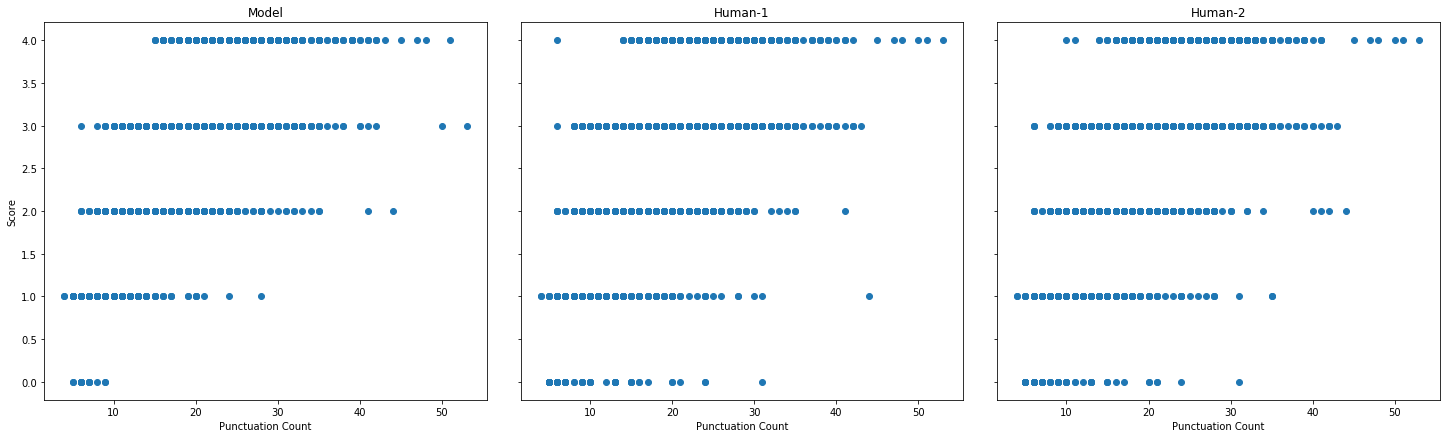

In [38]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(punc_count, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Punctuation Count)' % corr)
corr, _ = pearsonr(punc_count, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Punctuation Count)' % corr)
corr, _ = pearsonr(punc_count, model_score)
print('Pearson\'s correlation Model : %.3f  (Punctuation Count)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(punc_count, model_score)
axs[0].set_title('Model')
axs[1].scatter(punc_count, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(punc_count, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Punctuation Count', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('punc_count.png', bbox_inches="tight")

### 8. Spelling Error

In [39]:
spelling_error = x[:,7]

In [40]:
spelling_error

array([3., 5., 2., ..., 1., 2., 3.])

Pearson's correlation Human-1 : 0.185  (Spelling Error)
Pearson's correlation Human-2 : 0.186  (Spelling Error)
Pearson's correlation Model : 0.202  (Spelling Error)


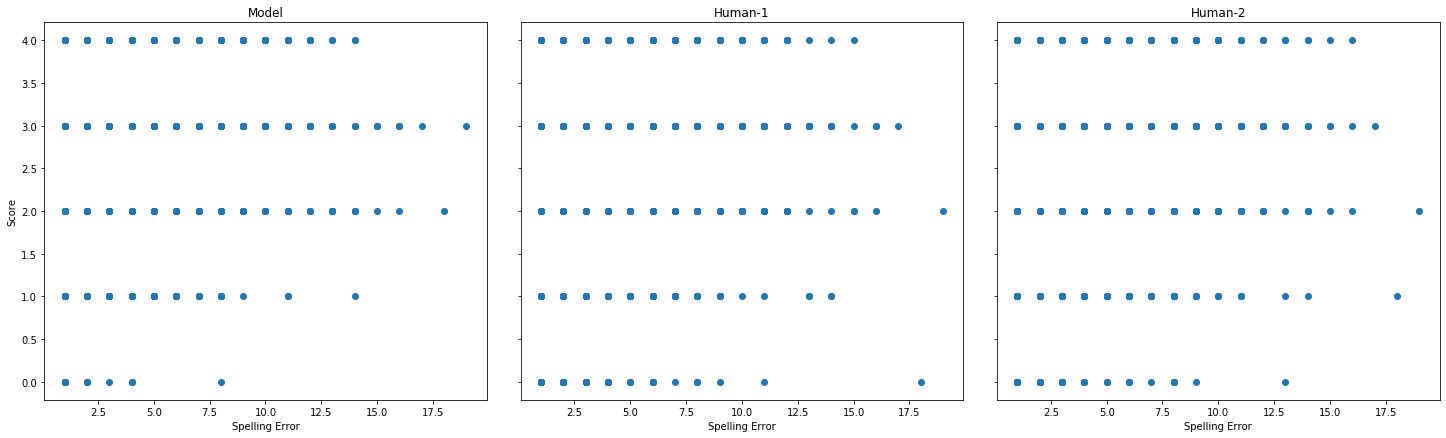

In [41]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(spelling_error, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Spelling Error)' % corr)
corr, _ = pearsonr(spelling_error, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Spelling Error)' % corr)
corr, _ = pearsonr(spelling_error, model_score)
print('Pearson\'s correlation Model : %.3f  (Spelling Error)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(spelling_error, model_score)
axs[0].set_title('Model')
axs[1].scatter(spelling_error, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(spelling_error, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Spelling Error', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('spelling_error.png', bbox_inches="tight")

### 9. Unique Words

In [43]:
unique_words = x[:,8]
unique_words

array([ 87., 108., 100., ...,  70.,  53.,  85.])

Pearson's correlation Human-1 : 0.688  (Unique Words)
Pearson's correlation Human-2 : 0.703  (Unique Words)
Pearson's correlation Model : 0.794  (Unique Words)


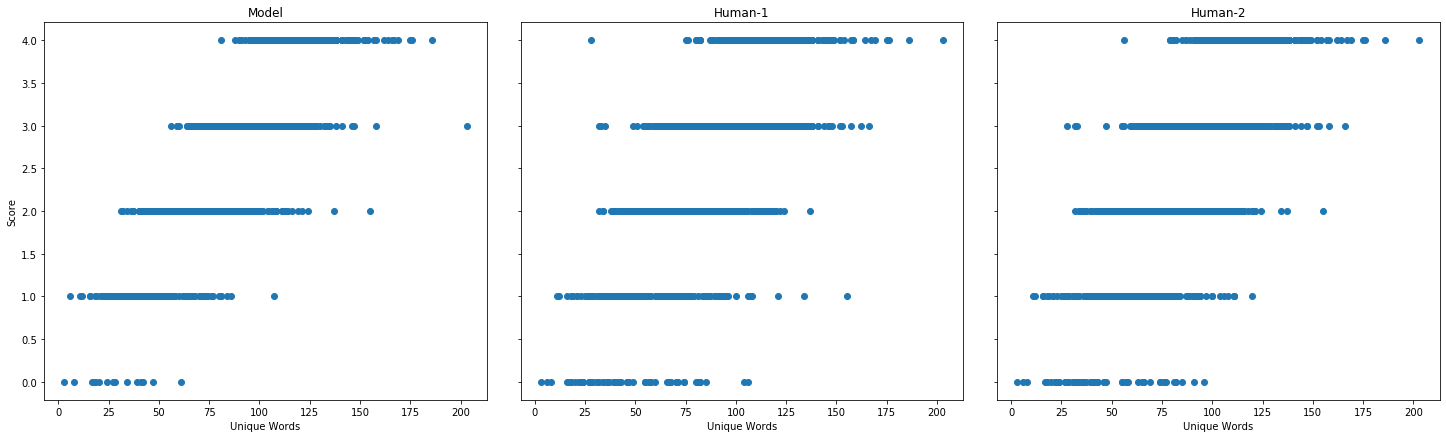

In [44]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(unique_words, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Unique Words)' % corr)
corr, _ = pearsonr(unique_words, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Unique Words)' % corr)
corr, _ = pearsonr(unique_words, model_score)
print('Pearson\'s correlation Model : %.3f  (Unique Words)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(unique_words, model_score)
axs[0].set_title('Model')
axs[1].scatter(unique_words, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(unique_words, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Unique Words', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('unique_words.png', bbox_inches="tight")

### 10. Prompt Similarity (SBert)

In [45]:
sbert_similarity = x[:,9]
sbert_similarity

array([0.80223393, 0.82248342, 0.8447684 , ..., 0.83944321, 0.76612556,
       0.76324701])

Pearson's correlation Human-1: 0.318 (Prompt Similarity (SBert))
Pearson's correlation Human-2: 0.328 (Prompt Similarity (SBert))
Pearson's correlation Model: 0.369 (Prompt Similarity (SBert))


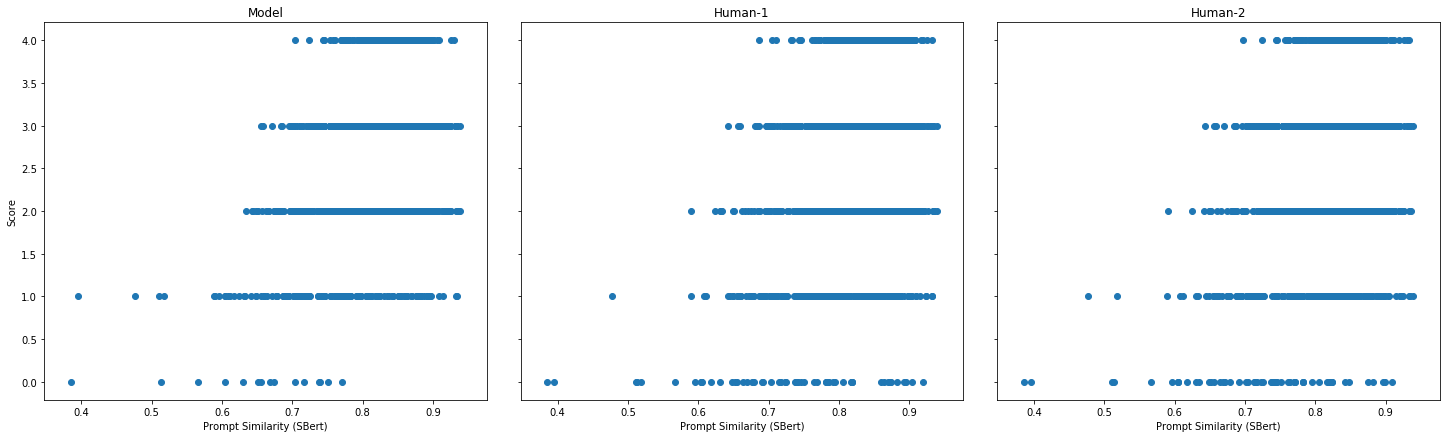

In [46]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(sbert_similarity, human1_score)
print('Pearson\'s correlation Human-1: %.3f (Prompt Similarity (SBert))' % corr)
corr, _ = pearsonr(sbert_similarity, human2_score)
print('Pearson\'s correlation Human-2: %.3f (Prompt Similarity (SBert))' % corr)
corr, _ = pearsonr(sbert_similarity, model_score)
print('Pearson\'s correlation Model: %.3f (Prompt Similarity (SBert))' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(sbert_similarity, model_score)
axs[0].set_title('Model')
axs[1].scatter(sbert_similarity, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(sbert_similarity, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Prompt Similarity (SBert)', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('sbert_similarity.png', bbox_inches="tight")

### 11. Prompt Similarity (BOW)

In [47]:
bow_similarity = x[:,10]
bow_similarity

array([0.73559076, 0.84617515, 0.70166289, ..., 0.80877756, 0.669869  ,
       0.66019515])

Pearson's correlation Human-1: 0.319 (Prompt Similarity (BOW))
Pearson's correlation Human-2: 0.311 (Prompt Similarity (BOW))
Pearson's correlation Model: 0.378 (Prompt Similarity (BOW))


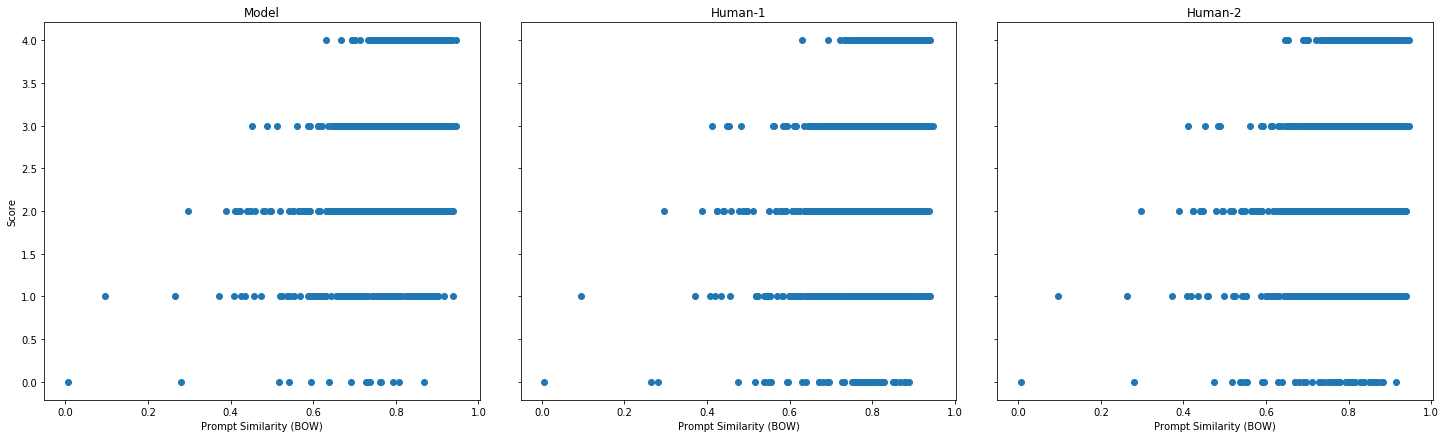

In [48]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(bow_similarity, human1_score)
print('Pearson\'s correlation Human-1: %.3f (Prompt Similarity (BOW))' % corr)
corr, _ = pearsonr(bow_similarity, human2_score)
print('Pearson\'s correlation Human-2: %.3f (Prompt Similarity (BOW))' % corr)
corr, _ = pearsonr(bow_similarity, model_score)
print('Pearson\'s correlation Model: %.3f (Prompt Similarity (BOW))' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(bow_similarity, model_score)
axs[0].set_title('Model')
axs[1].scatter(bow_similarity, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(bow_similarity, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Prompt Similarity (BOW)', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('bow_similarity.png', bbox_inches="tight")

### 12. Language Error

In [49]:
lang_error = x[:,11]
lang_error

array([ 3.,  2.,  2., ...,  7.,  1., 15.])

Pearson's correlation Human-1: 0.254 (Language Error)
Pearson's correlation Human-2: 0.250 (Language Error)
Pearson's correlation Model: 0.276 (Language Error)


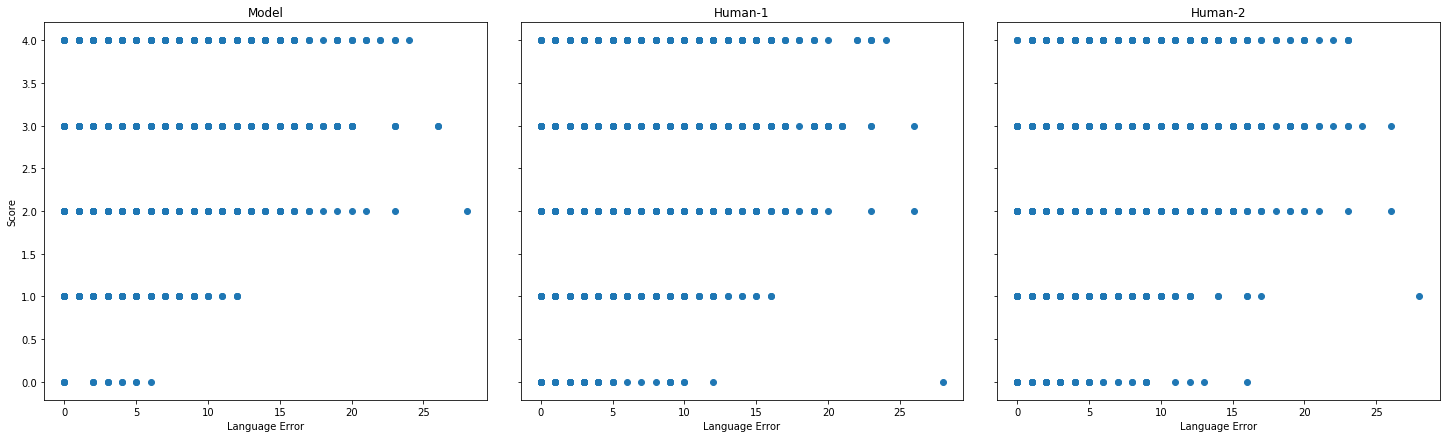

In [50]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(lang_error, human1_score)
print('Pearson\'s correlation Human-1: %.3f (Language Error)' % corr)
corr, _ = pearsonr(lang_error, human2_score)
print('Pearson\'s correlation Human-2: %.3f (Language Error)' % corr)
corr, _ = pearsonr(lang_error, model_score)
print('Pearson\'s correlation Model: %.3f (Language Error)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(lang_error, model_score)
axs[0].set_title('Model')
axs[1].scatter(lang_error, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(lang_error, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Language Error', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('lang_error.png', bbox_inches="tight")